In [ ]:
import plotly.express as px

df = px.data.iris()

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = px.data.iris()

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (150, 6)


In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_id      0
dtype: int64


In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_id        int64
dtype: object


In [ ]:
print("\nMean of numeric columns:\n", df.mean(numeric_only=True))


Mean of numeric columns:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
species_id      2.000000
dtype: float64


In [ ]:
print("\nCorrelation matrix:\n", df.corr(numeric_only=True))


Correlation matrix:
               sepal_length  sepal_width  petal_length  petal_width  species_id
sepal_length      1.000000    -0.109369      0.871754     0.817954    0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544   -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757    0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000    0.956464
species_id        0.782561    -0.419446      0.949043     0.956464    1.000000


In [ ]:
grouped = df.groupby('species').mean()
print("\nMean values grouped by species:\n", grouped)



Mean values grouped by species:
             sepal_length  sepal_width  petal_length  petal_width  species_id
species                                                                     
setosa             5.006        3.418         1.464        0.244         1.0
versicolor         5.936        2.770         4.260        1.326         2.0
virginica          6.588        2.974         5.552        2.026         3.0


In [ ]:
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 size='petal_length', hover_data=['petal_width'])
fig.show()

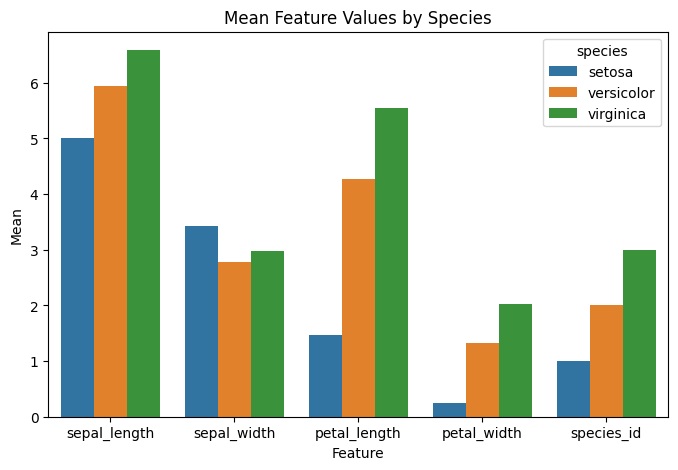

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

means = df.groupby('species')[numeric_cols].mean().reset_index()
means_melted = means.melt(id_vars='species', var_name='Feature', value_name='Mean')

plt.figure(figsize=(8,5))
sns.barplot(x='Feature', y='Mean', hue='species', data=means_melted)
plt.title('Mean Feature Values by Species')
plt.show()


fig = px.scatter_matrix(df,
                        dimensions=numeric_cols,
                        color='species',
                        title="Pairwise Comparison of Iris Features by Species")
fig.show()

In [2]:
import plotly.express as px
df = px.data.iris()
df['index'] = df.index
fig = px.scatter(df, x='sepal_length', y='petal_length',
                 animation_frame='index', color='species',
                 size='petal_width', hover_data=['sepal_width'],
                 title='Animated Scatter: Petal vs Sepal Growth Simulation')
fig.show()

In [4]:
import plotly.figure_factory as ff

# Exclude non-numeric columns ('species' and 'index') before calculating correlation
numeric_df = df.drop(columns=['species', 'index'])
corr = numeric_df.corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    colorscale='Viridis'
)
fig.update_layout(title='Feature Correlation Heatmap')
fig.show()